In [1]:
# for data analysis
import numpy as np
import pandas as pd
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movielens/users.dat
/kaggle/input/movielens/ratings.dat
/kaggle/input/movielens/movies.dat


<font size="5">**Working With Dataset** </font>

**Movies Dataframe**

In [2]:
# read the dataset, set column names, drop missing values rows, and display movies dataset
movies_df= pd.read_csv('../input/movielens/movies.dat', sep= '::', engine= 'python', encoding='latin-1')
movies_df.columns= ['MovieIDs', 'MovieName', 'Category']
movies_df.dropna(inplace= True)
movies_df.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
movies_df.describe() # statistical summary

,MovieIDs
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [4]:
movies_df.info() # summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieIDs   3882 non-null   int64 
 1   MovieName  3882 non-null   object
 2   Category   3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


**Ratings Dataframe**

In [5]:
# read the dataset, set column names, drop missing values rows, and display ratings dataset
ratings_df= pd.read_csv('../input/movielens/ratings.dat', sep= '::', engine= 'python', encoding='latin-1')
ratings_df.columns =['UserID', 'MovieID', 'Rating', 'TimeStamp']
ratings_df.dropna(inplace= True)
ratings_df.head()

,UserID,MovieID,Rating,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [6]:
ratings_df.describe()

,UserID,MovieID,Rating,TimeStamp
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000208 non-null  int64
 1   MovieID    1000208 non-null  int64
 2   Rating     1000208 non-null  int64
 3   TimeStamp  1000208 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


**Users Dataframe**

In [8]:
# read the dataset, set column names, drop missing values rows, and display user dataset
user_df= pd.read_csv('../input/movielens/users.dat', sep= '::', engine= 'python', encoding='latin-1')
user_df.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
user_df.dropna(inplace= True)
user_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [9]:
user_df.describe()

,UserID,Age,Occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [10]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6039 non-null   int64 
 1   Gender      6039 non-null   object
 2   Age         6039 non-null   int64 
 3   Occupation  6039 non-null   int64 
 4   Zip-code    6039 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [11]:
# concatenating dataframes into a unified dataframe 
movielens_df= pd.concat([movies_df, ratings_df, user_df], axis = 1) 
movielens_df.head(10)

,MovieIDs,MovieName,Category,UserID,MovieID,Rating,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,M,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,M,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,M,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,F,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595,5,978824268,11.0,F,25.0,1.0,04093


<font size="5">**Exploratory Data Analysis / User DF**</font>

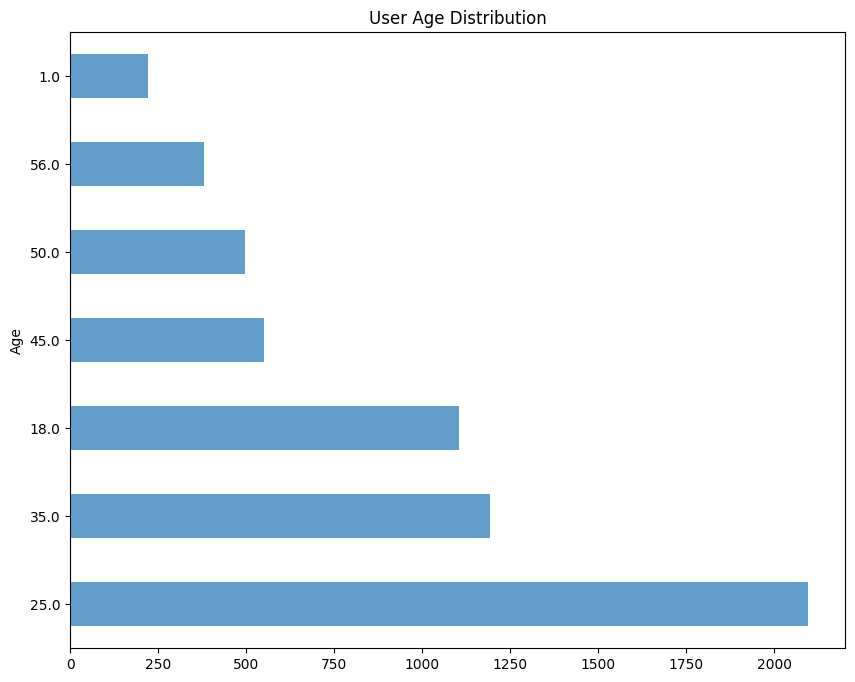

In [12]:
# age distribution of users 
movielens_df['Age'].value_counts().plot(kind= 'barh', alpha= 0.7, figsize= (10, 8))
plt.title("User Age Distribution")
plt.show()

Text(0, 0.5, 'User Count')

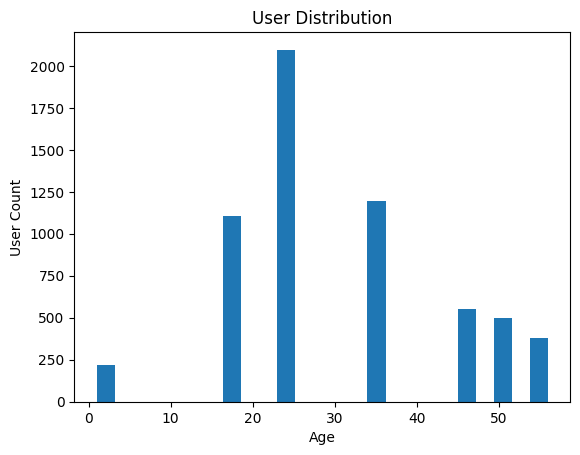

In [13]:
# plotting histogram to visualize the distribution
movielens_df.Age.plot.hist(bins= 25)
plt.title("User Distribution")
plt.xlabel("Age")
plt.ylabel("User Count")

In [14]:
# categorize ages into respective intervals or classes
age_class= ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
movielens_df['Age Classes']= pd.cut(movielens_df.Age, range(0, 81, 10), right= False, labels= age_class)
movielens_df[['Age', 'Age Classes']].drop_duplicates()[:10]

,Age,Age Classes
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


In [15]:
# male/female count
user_count= movielens_df['Gender'].value_counts()
user_count

Gender
M    4331
F    1708
Name: count, dtype: int64

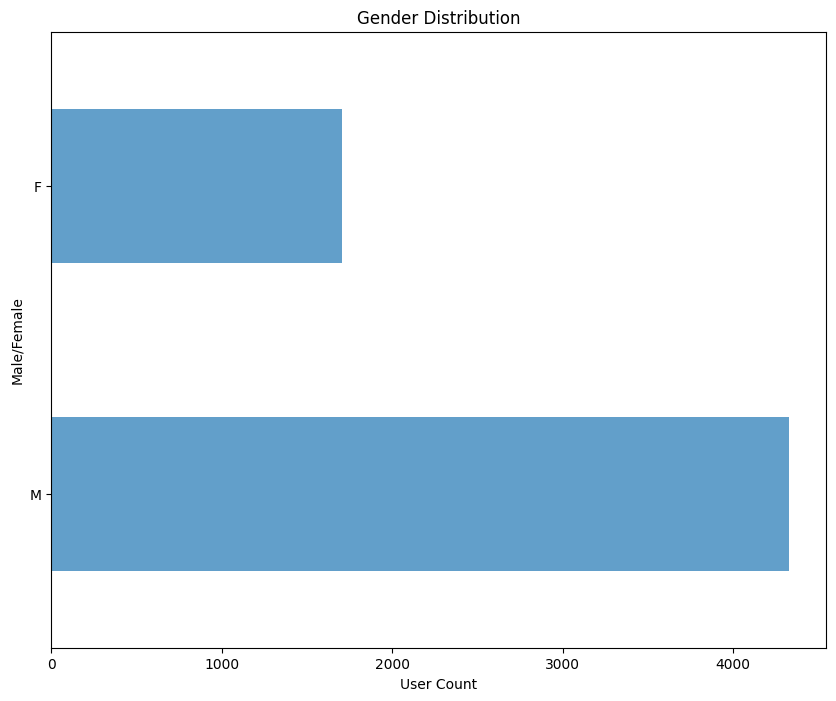

In [16]:
# visualization of gender distribution
movielens_df['Gender'].value_counts().plot(kind= 'barh', alpha= 0.7, figsize= (10, 8))
plt.title("Gender Distribution")
plt.xlabel("User Count")
plt.ylabel("Male/Female")
plt.show()

<font size="5">**Exploratory Data Analysis / Ratings DF**</font>

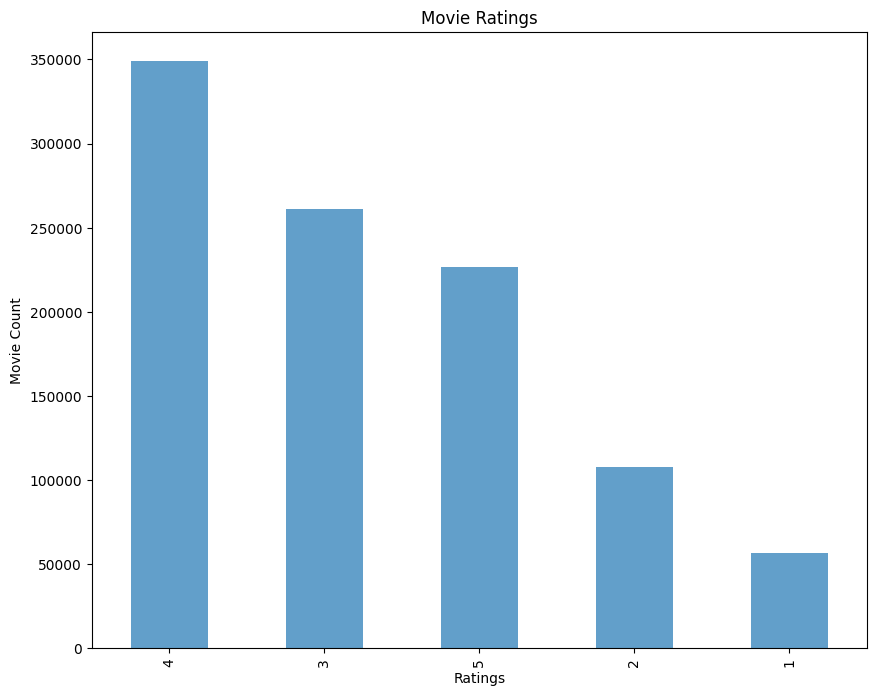

In [17]:
# visualization of user ratings
movielens_df['Rating'].value_counts().plot(kind= 'bar', alpha= 0.7, figsize= (10, 8))
plt.xlabel("Ratings")
plt.ylabel("Movie Count")
plt.title("Movie Ratings")
plt.show()

<font size="5">**Exploratory Data Analysis / Movies DF**</font>

In [18]:
# calculating total number of movies
movie_count= movielens_df['Rating'].value_counts().sum()
movie_count

1000208

In [19]:
# sorting movies in ascencding order
ascending_movies= movielens_df.groupby('MovieName').size().sort_values(ascending= True)[:1000]
ascending_movies

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64

In [20]:
# extracting 'Toy Story 2' and its shape
group_movieName= movielens_df.groupby('MovieName')
selected_movie= group_movieName.get_group('Toy Story 2 (1999)')
selected_movie.shape

(1, 13)

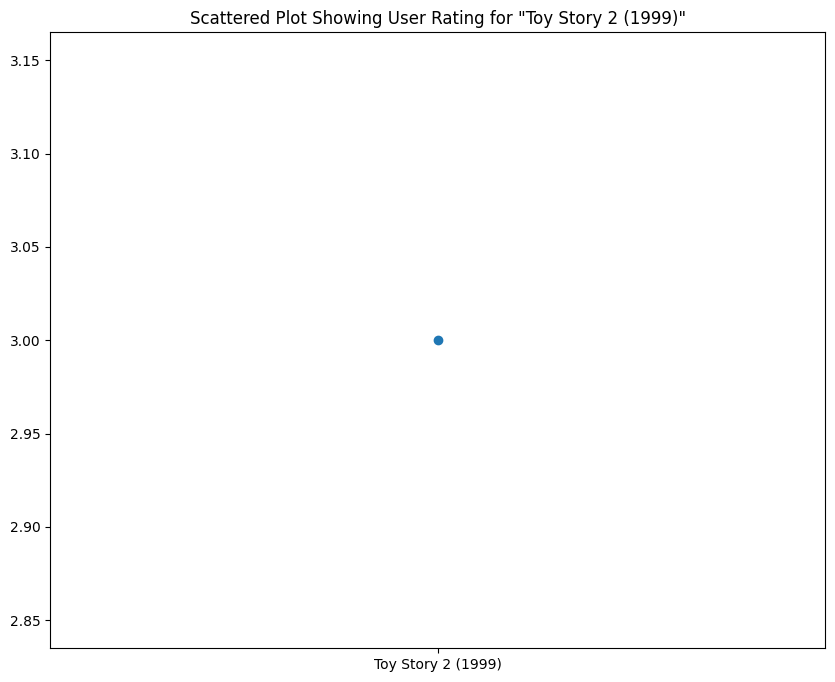

In [21]:
# visualization of the movie and its user ratings 
plt.figure(figsize= (10, 8))
plt.scatter(selected_movie['MovieName'], selected_movie['Rating'])
plt.title('Scattered Plot Showing User Rating for "Toy Story 2 (1999)"')
plt.show()

In [22]:
# visualization of viewership of the movie 'Toy Story 2 (1999)' by age group
selected_movie[['MovieName', 'Age Classes']]

,MovieName,Age Classes
3044,Toy Story 2 (1999),0-9


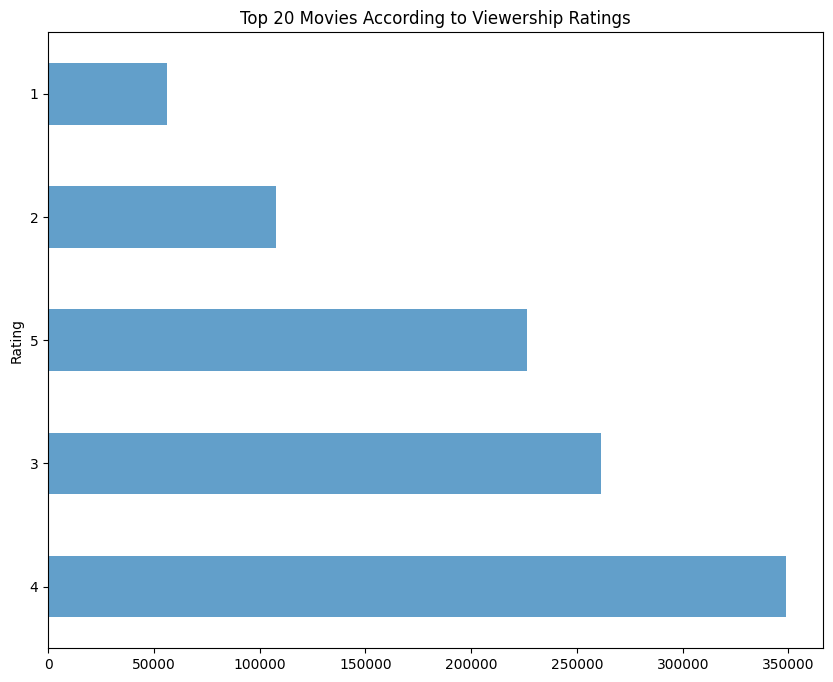

In [23]:
# visualization of the top 20 movies by viewership ratings
top_20= movielens_df[20:]
top_20['Rating'].value_counts().plot(kind= 'barh', alpha= 0.7, figsize=(10, 8))
plt.title('Top 20 Movies According to Viewership Ratings')
plt.show()

<font size="5">**Maching Learning Models**</font>

In [24]:
# extracted records are the first 1000 records of the dataset
extracted_record= movielens_df.iloc[:1000]
extracted_record.dropna()

,MovieIDs,MovieName,Category,UserID,MovieID,Rating,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,Age Classes
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072,50-59
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117,20-29
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460,40-49
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455,20-29
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1009.0,Escape to Witch Mountain (1975),Adventure|Children's|Fantasy,10,1020,3,978228726,997.0,M,1.0,19.0,15748,0-9
996,1010.0,"Love Bug, The (1969)",Children's|Comedy,10,784,3,978230946,998.0,M,45.0,20.0,10019,40-49
997,1011.0,Herbie Rides Again (1974),Adventure|Children's|Comedy,10,858,3,978224375,999.0,M,25.0,15.0,62558,20-29
998,1012.0,Old Yeller (1957),Children's|Drama,10,1022,5,979775689,1000.0,F,25.0,6.0,90027,20-29


In [25]:
# modifying Gender
gender_dict= {'M': 1, 'F': 0}
copy_df= extracted_record.copy() # making a copy of the original dataset for preservation
copy_df.loc[:, 'Gender']= copy_df['Gender'].replace(gender_dict)
copy_df.head()

,MovieIDs,MovieName,Category,UserID,MovieID,Rating,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,Age Classes
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1,56.0,16.0,70072,50-59
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1,25.0,15.0,55117,20-29
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1,45.0,7.0,02460,40-49
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1,25.0,20.0,55455,20-29
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0,50.0,9.0,55117,50-59


In [26]:
# movie_id, age, occupation are features 
features= copy_df[['MovieID', 'Gender', 'Age', 'Occupation']].values 

In [27]:
labels= copy_df['Rating'].values   

In [28]:
# splitting the dataframe into train and test
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size= 0.2, random_state= 1)

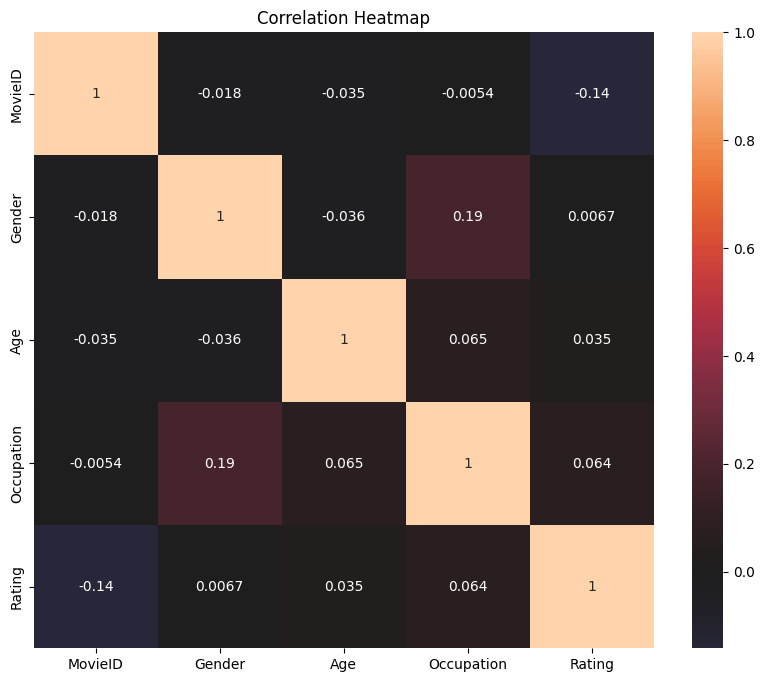

In [29]:
# correlation heatmap
features= copy_df[['MovieID', 'Gender', 'Age', 'Occupation', 'Rating']]
corr_matrix= features.corr()
plt.figure(figsize =(10, 8))
sns.heatmap(corr_matrix, annot= True, center= 0)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 0, 'Gender')

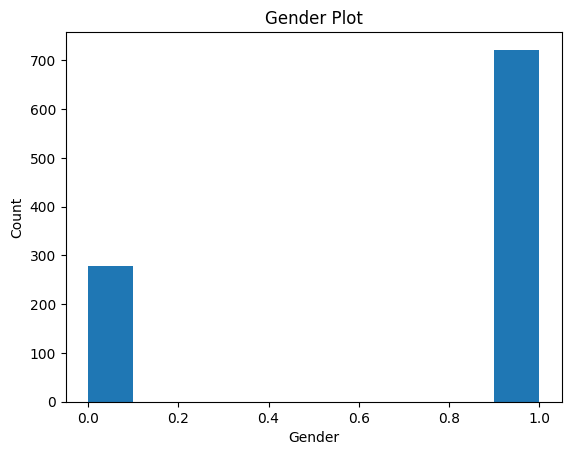

In [30]:
# plotting a histogram for gender
copy_df.Gender.plot.hist()
plt.title("Gender Plot")
plt.ylabel('Count')
plt.xlabel('Gender')

Text(0.5, 0, 'Age')

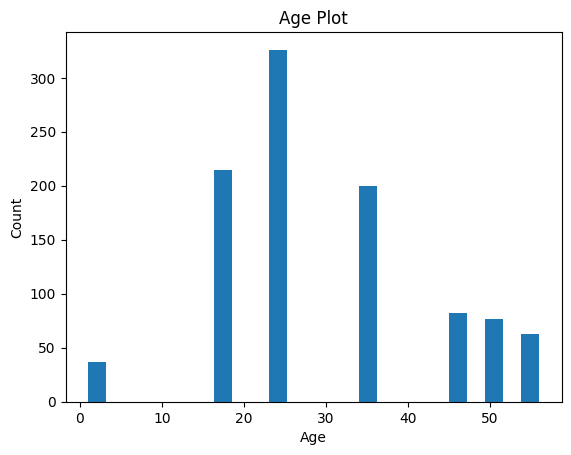

In [31]:
# plotting a histogram for age
copy_df.Age.plot.hist(bins= 25)
plt.title("Age Plot")
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'Occupation')

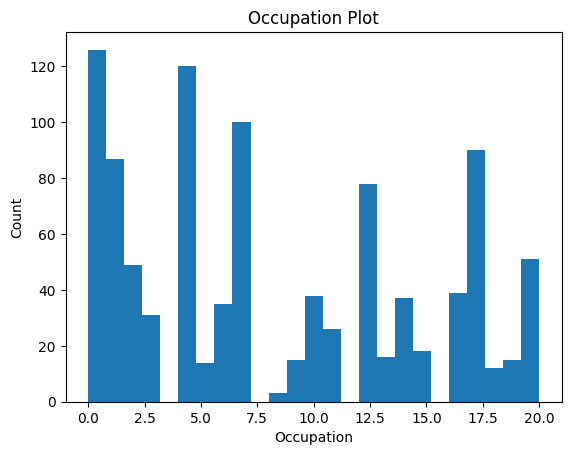

In [32]:
# plotting a histogram for occupation
copy_df.Occupation.plot.hist(bins= 25)
plt.title("Occupation Plot")
plt.ylabel('Count')
plt.xlabel('Occupation')

Text(0.5, 0, 'MovieID')

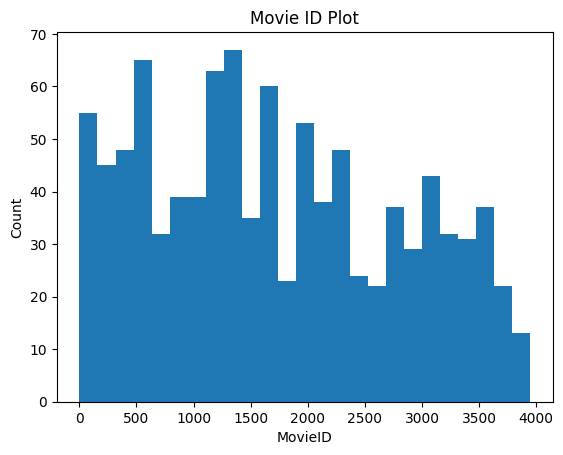

In [33]:
# plotting a histogram for movie id
copy_df.MovieID.plot.hist(bins= 25)
plt.title("Movie ID Plot")
plt.ylabel('Count')
plt.xlabel('MovieID')

In [34]:
# Support Vector Machines (SVC)
svc= SVC()
svc.fit(x_train, y_train) # fit the model on training data
y_predict= svc.predict(x_test)
accuracy_score_svc= round(svc.score(x_train, y_train) * 100, 2)
print(accuracy_score_svc)

38.88


In [35]:
# Decision Tree
decision_tree= DecisionTreeClassifier()
decision_tree.fit(x_train, y_train) # fit the model on training data
y_predict= decision_tree.predict(x_test)
accuracy_decision_tree= round(decision_tree.score(x_train, y_train) * 100, 2)
print(accuracy_decision_tree)

99.62


In [36]:
# K Nearest Neigbours Classifier
KN= KNeighborsClassifier(n_neighbors= 500)
KN.fit(x_train, y_train) # fit the model on training data
y_predict= KN.predict(x_test)
accuracy_KN= round(KN.score(x_train, y_train) * 100, 2)
print(accuracy_KN)

36.25


In [37]:
# Random Forest Classifier
random_forest= RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train, y_train) # fit the model on training data
y_predict= random_forest.predict(x_test)
random_forest.score(x_train, y_train)
accuracy_random_forest= round(random_forest.score(x_train, y_train) * 100, 2)
print(accuracy_random_forest)

99.62


In [38]:
# Logistic Regression
lr= LogisticRegression(max_iter= 20000)
lr.fit(x_train, y_train)
y_predict= lr.predict(x_test)
accuracy_lr= round(lr.score(x_train, y_train) * 100, 2)
print(accuracy_lr)

37.0


In [39]:
training_models= pd.DataFrame({'Model': ['Support Vector Machines(SVC)', 'K Nearest Neighbours(KNN)', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression'],'Score': [accuracy_score_svc, accuracy_KN, accuracy_random_forest, accuracy_decision_tree, accuracy_lr]})
training_models.sort_values(by= 'Score', ascending= False)

,Model,Score
2,Random Forest Classifier,99.62
3,Decision Tree Classifier,99.62
0,Support Vector Machines(SVC),38.88
4,Logistic Regression,37.00
1,K Nearest Neighbours(KNN),36.25


Random Forest and Decision Tree Classifiers produce accuracy score of almost **99%**.